# Combine data from flood, crime and HCAD from Selected ZIP Codes


In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import math



In [10]:
#Merge all flood csv data files in a dataframe
ZIP=['77002','77005','77006','77019','77025','77027','77030','77054','77098']

flood_all_zips_df=pd.DataFrame()
for z in ZIP:
    file=f'Output/flood_data_{z}.csv'
    df=pd.read_csv(file)
    flood_all_zips_df=flood_all_zips_df.append(df)
    
del flood_all_zips_df['Unnamed: 0']
flood_all_zips_df=flood_all_zips_df.reset_index(drop=True)
flood_all_zips_df.head()


  

,Address,Latitude,Longitude,Flood Description,Flood Zone
0,"2202 CAROLINE ST HOUSTON, Texas 77002",29.74614,-95.36987,AREA OF MINIMAL FLOOD HAZARD,X
1,"2218 CAROLINE ST HOUSTON, Texas 77002",29.74605,-95.37014,AREA OF MINIMAL FLOOD HAZARD,X
2,"2204 CAROLINE ST HOUSTON, Texas 77002",29.74619,-95.36996,AREA OF MINIMAL FLOOD HAZARD,X
3,"2206 CAROLINE ST HOUSTON, Texas 77002",29.74624,-95.37004,AREA OF MINIMAL FLOOD HAZARD,X
4,"1114 CHAPMAN ST HOUSTON, Texas 77002",29.77044,-95.35299,AREA OF MINIMAL FLOOD HAZARD,X


In [11]:
#Add flood ranking
#3- High Risk
#2 - Medium Risk
#1- Low Risk

flood_all_zips_df['Flood Risk']=np.where(flood_all_zips_df['Flood Description']=='AREA OF MINIMAL FLOOD HAZARD',1," ")
flood_all_zips_df.loc[(flood_all_zips_df['Flood Description']=='0.2 PCT ANNUAL CHANCE FLOOD HAZARD'),'Flood Risk']=2
flood_all_zips_df.loc[(flood_all_zips_df['Flood Zone']=='AE'),'Flood Risk']=3
flood_all_zips_df.reset_index(drop=True)
flood_all_zips_df.head()

,Address,Latitude,Longitude,Flood Description,Flood Zone,Flood Risk
0,"2202 CAROLINE ST HOUSTON, Texas 77002",29.74614,-95.36987,AREA OF MINIMAL FLOOD HAZARD,X,1
1,"2218 CAROLINE ST HOUSTON, Texas 77002",29.74605,-95.37014,AREA OF MINIMAL FLOOD HAZARD,X,1
2,"2204 CAROLINE ST HOUSTON, Texas 77002",29.74619,-95.36996,AREA OF MINIMAL FLOOD HAZARD,X,1
3,"2206 CAROLINE ST HOUSTON, Texas 77002",29.74624,-95.37004,AREA OF MINIMAL FLOOD HAZARD,X,1
4,"1114 CHAPMAN ST HOUSTON, Texas 77002",29.77044,-95.35299,AREA OF MINIMAL FLOOD HAZARD,X,1


In [12]:
#Merge Flood and HCAD DataFrames to get Account Number, Neighborhood code and group and rest of parameters

#Generate a colum that has SITE_ADDR_1
address_split=flood_all_zips_df['Address'].str.split(' ').tolist()
address_split=pd.DataFrame(address_split)
address_split['SITE_ADDR_1']=address_split[0]+ ' '+address_split[1]+' '+address_split[2]
address_split.head()
flood_all_zips_df['SITE_ADDR_1']=address_split['SITE_ADDR_1']

#Merge Flood data to HCAD by SITE_ADDR_1
HCAD_df=pd.read_csv('Resources/2019_single_fam_values.csv')
flood_all_zips_df=pd.merge(flood_all_zips_df,HCAD_df,on='SITE_ADDR_1')

flood_all_zips_df.to_csv('Output/flood_all_zips.csv')
flood_all_zips_df.head()


C:\Users\adria\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Address,Latitude,Longitude,Flood Description,Flood Zone,Flood Risk,SITE_ADDR_1,Unnamed: 0,ACCOUNT,TAX_YEAR,...,MARKET_AREA_2_DSCR,TOTAL_BUILDING_AREA,TOTAL_LAND_AREA,ACREAGE,LAND_VALUE,ASSESSED_VALUE,TOTAL_APPRAISED_VALUE,TOTAL_MARKET_VALUE,LAST_INSPECTED_DATE,NEW_OWNER_DATE
0,"2202 CAROLINE ST HOUSTON, Texas 77002",29.74614,-95.36987,AREA OF MINIMAL FLOOD HAZARD,X,1,2202 CAROLINE ST,1196,21750000003,2019,...,"1C Midtown, Riverside Terrace, University Areas",1944,1765,0.0405,88956.0,299000.0,299000.0,299000.0,2013-12-09 09:48:52.977,2009-10-13 00:00:00.000
1,"2218 CAROLINE ST HOUSTON, Texas 77002",29.74605,-95.37014,AREA OF MINIMAL FLOOD HAZARD,X,1,2218 CAROLINE ST,1200,21750000013,2019,...,"1C Midtown, Riverside Terrace, University Areas",2471,13500,0.3099,675000.0,815000.0,815000.0,815000.0,2013-12-16 15:20:11.267,1995-08-02 00:00:00.000
2,"2204 CAROLINE ST HOUSTON, Texas 77002",29.74619,-95.36996,AREA OF MINIMAL FLOOD HAZARD,X,1,2204 CAROLINE ST,1203,21750000018,2019,...,"1C Midtown, Riverside Terrace, University Areas",1944,1515,0.0348,84537.0,296400.0,296400.0,296400.0,2013-12-09 08:42:23.417,2018-06-29 00:00:00.000
3,"2206 CAROLINE ST HOUSTON, Texas 77002",29.74624,-95.37004,AREA OF MINIMAL FLOOD HAZARD,X,1,2206 CAROLINE ST,1204,21750000019,2019,...,"1C Midtown, Riverside Terrace, University Areas",1944,1720,0.0395,88236.0,299803.0,299803.0,299803.0,2013-12-09 08:37:01.483,2001-01-01 00:00:00.000
4,"1114 CHAPMAN ST HOUSTON, Texas 77002",29.77044,-95.35299,AREA OF MINIMAL FLOOD HAZARD,X,1,1114 CHAPMAN ST,11264,91190000006,2019,...,"1E Ryon, Irvington, Lindale Areas",1444,5033,0.1156,105347.0,142507.0,142507.0,142507.0,2016-11-22 09:22:07.120,2018-08-10 00:00:00.000


In [13]:
#Pull Crime Rate per ZIP Code and Rank
crime_df=pd.read_csv('Resources/2019_Houston_Crimes.csv')
crime_zips=crime_df.groupby(['ZIP Code'])
crime_zips=crime_zips['Offense Count'].sum()[ZIP]
crime_zips_df=pd.DataFrame(crime_zips)
crime_zips_df=crime_zips_df.reset_index()
max=crime_zips_df['Offense Count'].max()
min=crime_zips_df['Offense Count'].min()
crime_zips_df['crime_rank']=1-(crime_zips_df['Offense Count']-min)/(max-min)
crime_zips_df.head(10)


,ZIP Code,Offense Count,crime_rank
0,77002,4870,0.000000
1,77005,1026,1.000000
2,77006,3759,0.289022
3,77019,2330,0.660770
4,77025,2270,0.676379
5,77027,2014,0.742976
6,77030,1485,0.880593
7,77054,3053,0.472685
8,77098,2051,0.733351


In [14]:
#Add Crime Rate to Flood and HCAD dataframe.
#Export file with all data 
flood_crime_hcad_df=pd.merge(flood_all_zips_df,crime_zips_df,left_on='SITE_ADDR_3', right_on='ZIP Code')
flood_crime_hcad_df=flood_crime_hcad_df.drop(['ZIP Code','Unnamed: 0'],axis=1)
flood_crime_hcad_df.to_csv('Output/flood_crime_hcad.csv')
flood_crime_hcad_df.head()

,Address,Latitude,Longitude,Flood Description,Flood Zone,Flood Risk,SITE_ADDR_1,ACCOUNT,TAX_YEAR,SITE_ADDR_2,...,TOTAL_LAND_AREA,ACREAGE,LAND_VALUE,ASSESSED_VALUE,TOTAL_APPRAISED_VALUE,TOTAL_MARKET_VALUE,LAST_INSPECTED_DATE,NEW_OWNER_DATE,Offense Count,crime_rank
0,"2202 CAROLINE ST HOUSTON, Texas 77002",29.74614,-95.36987,AREA OF MINIMAL FLOOD HAZARD,X,1,2202 CAROLINE ST,21750000003,2019,HOUSTON,...,1765,0.0405,88956.0,299000.0,299000.0,299000.0,2013-12-09 09:48:52.977,2009-10-13 00:00:00.000,4870,0.0
1,"2218 CAROLINE ST HOUSTON, Texas 77002",29.74605,-95.37014,AREA OF MINIMAL FLOOD HAZARD,X,1,2218 CAROLINE ST,21750000013,2019,HOUSTON,...,13500,0.3099,675000.0,815000.0,815000.0,815000.0,2013-12-16 15:20:11.267,1995-08-02 00:00:00.000,4870,0.0
2,"2204 CAROLINE ST HOUSTON, Texas 77002",29.74619,-95.36996,AREA OF MINIMAL FLOOD HAZARD,X,1,2204 CAROLINE ST,21750000018,2019,HOUSTON,...,1515,0.0348,84537.0,296400.0,296400.0,296400.0,2013-12-09 08:42:23.417,2018-06-29 00:00:00.000,4870,0.0
3,"2206 CAROLINE ST HOUSTON, Texas 77002",29.74624,-95.37004,AREA OF MINIMAL FLOOD HAZARD,X,1,2206 CAROLINE ST,21750000019,2019,HOUSTON,...,1720,0.0395,88236.0,299803.0,299803.0,299803.0,2013-12-09 08:37:01.483,2001-01-01 00:00:00.000,4870,0.0
4,"1114 CHAPMAN ST HOUSTON, Texas 77002",29.77044,-95.35299,AREA OF MINIMAL FLOOD HAZARD,X,1,1114 CHAPMAN ST,91190000006,2019,HOUSTON,...,5033,0.1156,105347.0,142507.0,142507.0,142507.0,2016-11-22 09:22:07.120,2018-08-10 00:00:00.000,4870,0.0


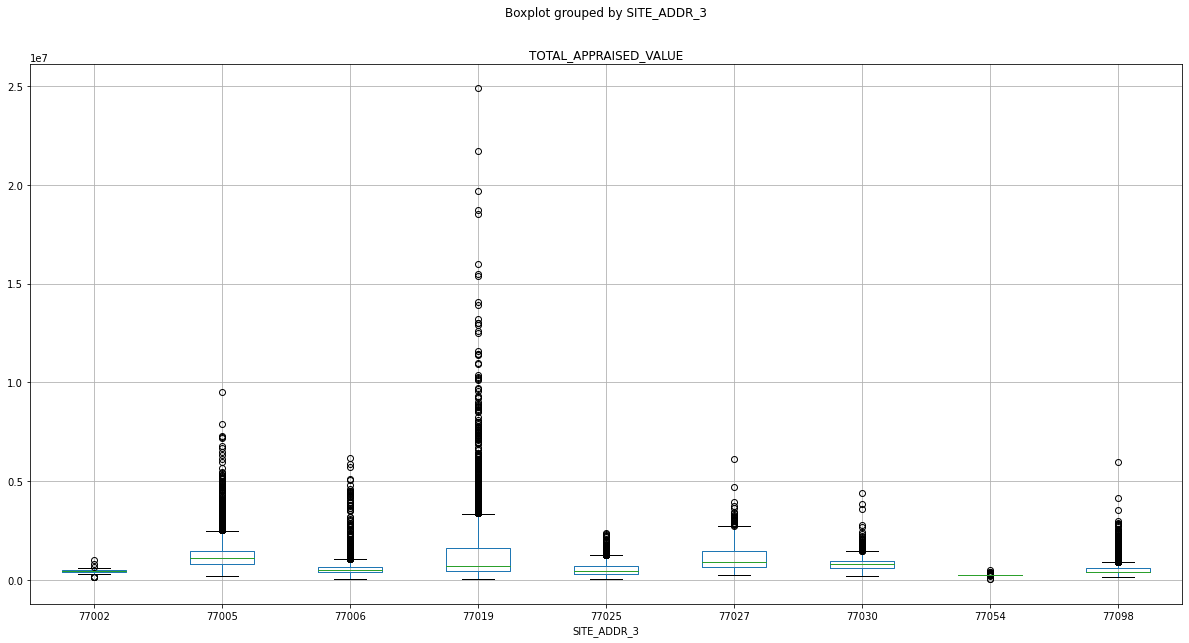

In [15]:
#def myboxplot (x,y):

# Create a boxplot to compare means
fig1=flood_crime_hcad_df.boxplot("TOTAL_APPRAISED_VALUE", by="SITE_ADDR_3", figsize=(20, 10)) 

   